# Stoke Prediction and Prevention


* This dataset includes demographic and health-related information, such as gender, age, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, smoking status, and stroke occurrence to predict the possibility of patient on having stroke  

- Done By :
   * Meera Mahboob Al-Bulushi - 16S19111
   * Maram Abdullah Al-Nuaimi - 16S1967

* <h2> Problem Statement </h2>

It is a medical procedure to examine specific factors related 
to a patient's health in a hospital i order to determine whether or not a patient has a risk of suffering a heart stroke. Among these factors are the gender, age, blood pressure level, blood glucose level, and body mass index of the patient.

* <h4> Installing and Importing the required packages </h4>

In [2]:
!pip install umap-learn

In [3]:
!pip install altair

In [4]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import umap.umap_ as umap
from sklearn.feature_selection import f_regression
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Importing the stroke Dataset 
heart = pd.read_csv('strokeDF.csv')
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5112,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5113,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5114,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5115,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Columns Description

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
* stroke: 1 if the patient had a stroke or 0 if not

<h2><i>Data Cleaning and Preprocessing</i></h2>

* Data cleaning is a crucial step in the machine learning (ML) pipeline, as it involves identifying and removing any missing, duplicate, or irrelevant data. The goal of data cleaning is to ensure that the data is accurate, consistent, and free of errors, as incorrect or inconsistent data can negatively impact the performance of the ML model.

In [6]:
#drop the unwanted rows and keep only 520 rows 

heart.drop(heart.index[520::], inplace=True)
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,24892,Male,64,0,0,Yes,Private,Rural,97.08,31.7,Unknown,0
516,29496,Female,39,0,0,Yes,Private,Rural,84.79,35.7,never smoked,0
517,19939,Female,46,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked,0
518,27832,Female,51,0,0,Yes,Private,Rural,82.93,29.7,smokes,0


In [7]:
# See the duplicated rows
heart[heart['id'].duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
488,70943,Female,80,0,0,Yes,Private,Urban,73.54,24.0,Unknown,1
489,37132,Male,82,0,0,Yes,Govt_job,Urban,200.59,29.0,formerly smoked,1
490,48796,Female,75,0,0,Yes,Govt_job,Urban,62.48,NaN,Unknown,1
491,53440,Female,73,1,0,Yes,Private,Rural,190.14,36.5,never smoked,1
492,16817,Female,78,1,0,No,Private,Urban,130.54,20.1,never smoked,1
493,69551,Male,69,1,0,No,Private,Rural,182.99,36.5,never smoked,1
494,31563,Female,38,0,0,Yes,Private,Rural,101.45,NaN,formerly smoked,1


In [8]:
# Remove the duplicated rows 
heart = heart.drop_duplicates()
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,24892,Male,64,0,0,Yes,Private,Rural,97.08,31.7,Unknown,0
516,29496,Female,39,0,0,Yes,Private,Rural,84.79,35.7,never smoked,0
517,19939,Female,46,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked,0
518,27832,Female,51,0,0,Yes,Private,Rural,82.93,29.7,smokes,0


In [9]:
# Unknown values in 'smoking_status' are considered null values 
heart[heart['smoking_status'] == 'Unknown']
heart.replace('Unknown', np.nan, inplace=True)
heart

C:\Users\meroa\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,24892,Male,64,0,0,Yes,Private,Rural,97.08,31.7,NaN,0
516,29496,Female,39,0,0,Yes,Private,Rural,84.79,35.7,never smoked,0
517,19939,Female,46,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked,0
518,27832,Female,51,0,0,Yes,Private,Rural,82.93,29.7,smokes,0


In [10]:
heart['smoking_status'].value_counts()

never smoked       185
formerly smoked    113
smokes              87
Name: smoking_status, dtype: int64

In [11]:
# Show the Noisy Data in age column
heart[heart['age'] == '?']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6,53882,Male,?,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
37,24977,Female,?,1,0,Yes,Private,Rural,500.00,23.1,formerly smoked,1
58,58631,Male,?,1,0,Yes,Self-employed,Urban,194.99,32.8,never smoked,1
119,5563,Female,?,0,0,Yes,Private,Urban,105.22,31.0,never smoked,1
162,69768,Female,?,0,0,No,children,Urban,70.37,NaN,NaN,1
175,14431,Male,?,1,0,Yes,Self-employed,Rural,185.49,37.1,never smoked,1
176,62466,Female,?,0,0,Yes,Private,Urban,64.44,45.0,never smoked,1
177,36841,Male,?,1,0,Yes,Self-employed,Rural,56.11,25.5,formerly smoked,1
178,33486,Female,?,0,0,Yes,Govt_job,Urban,110.66,NaN,NaN,1
179,65105,Male,?,0,0,Yes,Private,Urban,213.22,26.1,NaN,1


In [12]:
# Handle and remove Noisy Data 
heart.replace('?',np.nan, inplace=True)
heart

C:\Users\meroa\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,24892,Male,64,0,0,Yes,Private,Rural,97.08,31.7,NaN,0
516,29496,Female,39,0,0,Yes,Private,Rural,84.79,35.7,never smoked,0
517,19939,Female,46,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked,0
518,27832,Female,51,0,0,Yes,Private,Rural,82.93,29.7,smokes,0


In [13]:
heart[heart['age'] == '?']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [14]:
heart.isnull().sum()

id                     0
gender                 0
age                   14
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level     13
bmi                   45
smoking_status       128
stroke                 0
dtype: int64

In [15]:
#Forward Fill (impute) the null values 
heart = heart.fillna(method='ffill', axis=0)
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,24892,Male,64,0,0,Yes,Private,Rural,97.08,31.7,formerly smoked,0
516,29496,Female,39,0,0,Yes,Private,Rural,84.79,35.7,never smoked,0
517,19939,Female,46,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked,0
518,27832,Female,51,0,0,Yes,Private,Rural,82.93,29.7,smokes,0


In [16]:
# Check if the null values are filled 
heart.notnull().sum()

id                   513
gender               513
age                  513
hypertension         513
heart_disease        513
ever_married         513
work_type            513
Residence_type       513
avg_glucose_level    513
bmi                  513
smoking_status       513
stroke               513
dtype: int64

In [17]:
heart.dtypes

id                     int64
gender                object
age                   object
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [18]:
# Change the datatype of age from object to float
heart = heart.astype({
    'age': float,
})

In [19]:
heart['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

# <i> Exploratory Data Analysis (EDA) </i>

* EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like: – main features of data – variables and relationships that hold between them – identifying which variables are important for our problem We shall look at various exploratory data analysis methods

* <h3><b> Statistical Methods</b></h3>

* Statistical analysis is a scientific tool in AI and ML that helps collect and analyze large amounts of data to identify common patterns and trends to convert them into meaningful information. In simple words, statistical analysis is a data analysis tool that helps draw meaningful conclusions from raw and unstructured data. This includes <i><b>mean, median, mode, variance, standard deviation, etc.</b></i>

In [20]:
#Statistical Data about the dataframe
heart.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,36809.670565,55.320702,0.181287,0.116959,122.627719,30.424172,0.485380
std,21655.837636,21.754410,0.385631,0.321685,60.606382,8.396760,0.500274
min,129.000000,0.640000,0.000000,0.000000,55.390000,5.000000,0.000000
25%,17718.000000,42.000000,0.000000,0.000000,79.810000,25.200000,0.000000
50%,36275.000000,59.000000,0.000000,0.000000,97.920000,28.900000,0.000000
75%,55810.000000,75.000000,0.000000,0.000000,162.960000,34.500000,1.000000
max,72918.000000,82.000000,1.000000,1.000000,500.000000,85.000000,1.000000


In [21]:
heart.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,513,513,513,513,513
unique,2,2,5,2,3
top,Female,Yes,Private,Rural,never smoked
freq,308,399,304,258,244


In [22]:
# Mean of numeric age, avg_glocuse_level , bmi columns only 

heart.mean(numeric_only=True)[['age','avg_glucose_level','bmi']]

age                   55.320702
avg_glucose_level    122.627719
bmi                   30.424172
dtype: float64

In [23]:
# Median of numeric columns only 

heart.median(numeric_only=True)[['age','avg_glucose_level','bmi']]

age                  59.00
avg_glucose_level    97.92
bmi                  28.90
dtype: float64

In [24]:
# Mode of each column in the data frame

heart.mode().iloc[0] 

id                            129
gender                     Female
age                          78.0
hypertension                  0.0
heart_disease                 0.0
ever_married                  Yes
work_type                 Private
Residence_type              Rural
avg_glucose_level           99.33
bmi                          27.3
smoking_status       never smoked
stroke                        0.0
Name: 0, dtype: object

* Comparing the smoking status with each of (age, avg_glucose_level, bmi)

In [25]:
# Group the smoking status by the mean of ages.

heart.groupby('smoking_status').mean(numeric_only=True)[['age']]

,age
smoking_status,
formerly smoked,60.536154
never smoked,54.073279
smokes,50.814159


In [26]:
# Group the smoking status by the mean of avg glucose level.

heart.groupby('smoking_status').mean(numeric_only=True)[['avg_glucose_level']]

,avg_glucose_level
smoking_status,
formerly smoked,130.187436
never smoked,120.561762
smokes,116.652301


In [27]:
# Group the smoking status by the mean of bmi.

heart.groupby('smoking_status').mean(numeric_only=True)[['bmi']]

,bmi
smoking_status,
formerly smoked,30.932692
never smoked,30.438115
smokes,29.692035


In [28]:
# The variance of (age, avg_glucose_level, bmi) of sample ( by default ddof=1)

heart.var(numeric_only=True)[['age','avg_glucose_level','bmi']]

age                   473.254340
avg_glucose_level    3673.133562
bmi                    70.505586
dtype: float64

In [29]:
# The variabnce of population (dd0f=0)

heart.var(ddof=0, numeric_only=True)[['age','avg_glucose_level','bmi']]

age                   472.331817
avg_glucose_level    3665.973457
bmi                    70.368149
dtype: float64

In [30]:
# The Standard Deviation of (age, avg_glucose_level, bmi)

heart.std(numeric_only=True)[['age','avg_glucose_level','bmi']]

age                  21.754410
avg_glucose_level    60.606382
bmi                   8.396760
dtype: float64

- Percentiles : Measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall.

- Quantile : A particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit.

In [31]:
# Percentile and Quantile of the age

Q1 = heart['age'].quantile(0.25)
Q2 = heart['age'].quantile(0.50)
Q3 = heart['age'].quantile(0.75)

IQR = Q3-Q1
print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")
print(f"Q3 = {Q3}")
print(f"The IQR  = Q3-Q1 = {IQR}")

Q1 = 42.0
Q2 = 59.0
Q3 = 75.0
The IQR  = Q3-Q1 = 33.0


In [32]:
# The upper and lower limit of the age column

LL = Q1 - (1.5*IQR)
UL = Q3 + (1.5*IQR)
print(f"Upper Limit (UL) = {UL}, and Lower Limit (LL) = {LL}")

Upper Limit (UL) = 124.5, and Lower Limit (LL) = -7.5


In [33]:
# Percentile and Quantile of the avg_glucose_level

Q1 = heart['avg_glucose_level'].quantile(0.25)
Q2 = heart['avg_glucose_level'].quantile(0.50)
Q3 = heart['avg_glucose_level'].quantile(0.75)

IQR = Q3-Q1
print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")
print(f"Q3 = {Q3}")
print(f"The IQR  = Q3-Q1 = {IQR}")

Q1 = 79.81
Q2 = 97.92
Q3 = 162.96
The IQR  = Q3-Q1 = 83.15


In [34]:
# The upper and lower limit of the avg_glucose_level column
LL = Q1 - (1.5*IQR)
UL = Q3 + (1.5*IQR)
print(f"Upper Limit (UL) = {UL}, and Lower Limit (LL) = {LL}")

Upper Limit (UL) = 287.685, and Lower Limit (LL) = -44.915000000000006


In [35]:
# Percentile and Quantile of the bmi
Q1 = heart['bmi'].quantile(0.25)
Q2 = heart['bmi'].quantile(0.50)
Q3 = heart['bmi'].quantile(0.75)

IQR = Q3-Q1
print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")
print(f"Q3 = {Q3}")
print(f"The IQR  = Q3-Q1 = {IQR}")

Q1 = 25.2
Q2 = 28.9
Q3 = 34.5
The IQR  = Q3-Q1 = 9.3


In [36]:
# The upper and lower limit of the bmi column
LL = Q1 - (1.5*IQR)
UL = Q3 + (1.5*IQR)
print(f"Upper Limit (UL) = {UL}, and Lower Limit (LL) = {LL}")

Upper Limit (UL) = 48.45, and Lower Limit (LL) = 11.249999999999998


<h3> <i> Outliers </i> </h3>
* Is an observation that lies an abnormal distance from other values in a random sample from a population.

* for each columns (age , avg_glocuse_level, bmi)

* And see the numbers between and not between the outliers

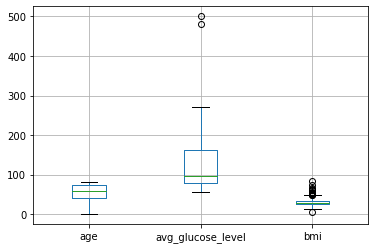

In [37]:
# Check if there is outliers in each column
heart.boxplot(column=['age','avg_glucose_level','bmi'])
plt.show()

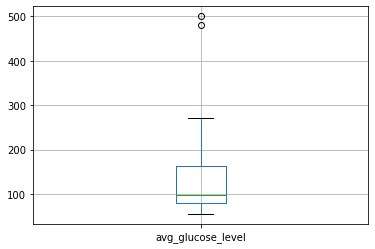

In [38]:
# Show the BoxPlot to display the ouliers
heart.boxplot(column = 'avg_glucose_level')
plt.show()

In [39]:
# Applying the IQR method to get all the ouliers 
def outlier(column):
    Q1 = heart[column].quantile(0.25)
    Q3 = heart[column].quantile(0.75)
    IQR = Q3-Q1
    ll = Q1-(1.5*IQR)
    ul = Q3+(1.5*IQR)
    return ll,ul

In [40]:
l1,u1 = outlier('avg_glucose_level')
print(f"LL= {l1}, UL={u1}")

LL= -44.915000000000006, UL=287.685


In [41]:
#The numbers within the lower limit and upper limit
heart[heart['avg_glucose_level'].between(l1,u1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,24892,Male,64.0,0,0,Yes,Private,Rural,97.08,31.7,formerly smoked,0
516,29496,Female,39.0,0,0,Yes,Private,Rural,84.79,35.7,never smoked,0
517,19939,Female,46.0,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked,0
518,27832,Female,51.0,0,0,Yes,Private,Rural,82.93,29.7,smokes,0


In [42]:
# the numbers that are not within the lower and upper limit

heart[~heart['avg_glucose_level'].between(l1,u1)] # to check if there is still outliers 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
37,24977,Female,74.0,1,0,Yes,Private,Rural,500.0,23.1,formerly smoked,1
60,10710,Female,56.0,0,0,Yes,Private,Urban,480.0,40.4,formerly smoked,1


In [1]:
heart=heart[heart['avg_glucose_level'].between(l1,u1)]
heart

NameError: name 'heart' is not defined

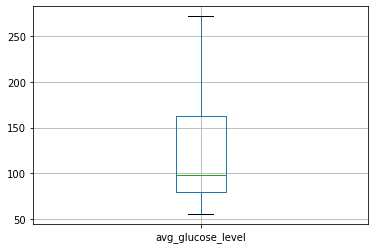

In [44]:
# Oultiers Removed Sucessfully 
heart.boxplot(column = 'avg_glucose_level')
plt.show() 

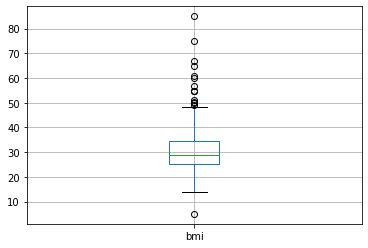

In [45]:
heart.boxplot(column = 'bmi')
plt.show()

In [46]:
l2,u2 = outlier('bmi')
print(f"LL = {l2}, UL={u2}")

LL = 11.249999999999998, UL=48.45


In [47]:
#The numbers not within the lower limit and upper limit(Outliers)
heart[~heart['bmi'].between(l2,u2)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,85.0,formerly smoked,1
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
34,14248,Male,48.0,0,0,No,Govt_job,Urban,84.20,75.0,never smoked,1
61,55927,Female,80.0,1,0,Yes,Private,Rural,74.90,67.0,never smoked,1
94,54385,Male,45.0,0,0,Yes,Private,Rural,64.14,5.0,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,formerly smoked,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
333,1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0


In [48]:
# Replace the outliers by the median of bmi

heart = heart[heart['bmi'].between(l2,u2)]
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,24892,Male,64.0,0,0,Yes,Private,Rural,97.08,31.7,formerly smoked,0
516,29496,Female,39.0,0,0,Yes,Private,Rural,84.79,35.7,never smoked,0
517,19939,Female,46.0,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked,0
518,27832,Female,51.0,0,0,Yes,Private,Rural,82.93,29.7,smokes,0


In [49]:
# No Outliers 
heart[~heart['bmi'].between(l2,u2)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


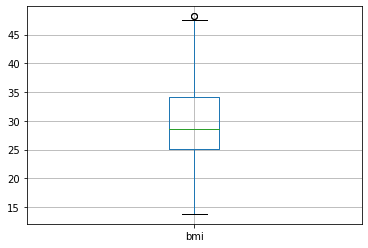

In [50]:
# Check if the outliers are replaced successfully
heart.boxplot(column = 'bmi')
plt.show()

In [51]:
# The Correlation for the table
heart.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.039982,-0.026848,0.037974,0.012887,0.036139,0.017310
age,0.039982,1.000000,0.254807,0.272328,0.286808,0.194814,0.587242
hypertension,-0.026848,0.254807,1.000000,0.076166,0.231157,0.146068,0.219855
heart_disease,0.037974,0.272328,0.076166,1.000000,0.227582,0.062032,0.228435
avg_glucose_level,0.012887,0.286808,0.231157,0.227582,1.000000,0.267408,0.206418
bmi,0.036139,0.194814,0.146068,0.062032,0.267408,1.000000,0.094865
stroke,0.017310,0.587242,0.219855,0.228435,0.206418,0.094865,1.000000


* <h3> Heat Map </h3>

* it is a two-dimensional representation of data in which various values are represented by colors. 

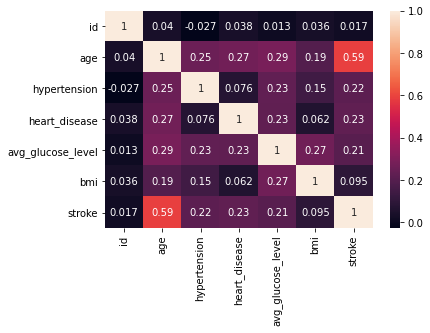

In [52]:
sn.heatmap(heart.corr(), annot=True)
plt.show()

In [53]:
# The flash(light) colors represent a high correlation between the columns
# There is a very low correlation between the columns and represented by dark color 
# There is a low positive correlation between age and hypertention
# There is a low negative correlation between the hypertension and the id

# Data Visualization 

Data can be represented visually with charts, plots, infographics, and even animations. It is easy to communicate complex data relationships through these visual displays
has context menu

* <h3> Scatter Plot </h3>

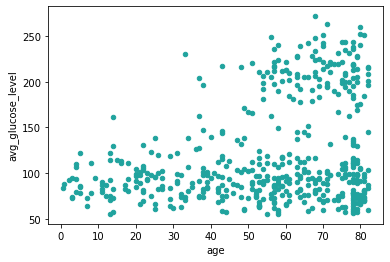

In [54]:
heart.plot(kind='scatter', x='age', y='avg_glucose_level', color='#20A39E')
plt.show()

* <b>There is a low positive correlation and a weak relationship between the age and the avg_glucose_level columns</b>

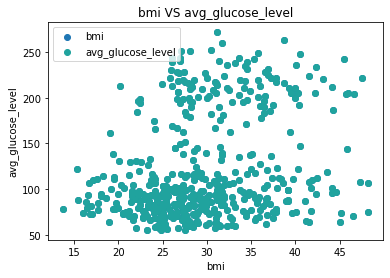

In [55]:
plt.scatter(heart.bmi, heart.avg_glucose_level, label='bmi')
plt.scatter(heart.bmi, heart.avg_glucose_level, label='avg_glucose_level', color='#20A39E')
plt.xlabel('bmi')
plt.ylabel('avg_glucose_level')
plt.title("bmi VS avg_glucose_level")
plt.legend()
plt.show()

* <b>There is positive low correlation and a weak relationship between the bmi and avg_glusoce_level columns</b>

* <h3> Pie Chart </h3>

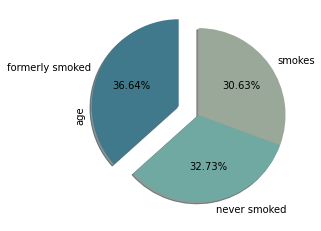

In [56]:
heart.groupby('smoking_status')['age'].mean().plot(kind='pie',
                                                    autopct="%1.2f%%",
                                                    explode=[0.25,0,0],
                                                    colors = ['#40798C','#70A9A1','#9AA899'],
                                                    startangle=90,
                                                    shadow= True)
plt.show()

In [57]:
# A pie chart representing the distribution of mean ages for each smoking status category 
# shows percentages like "36.64 % formerly smoked" for each smoking status in the dataset.

* <h3> Bar Chart </h3>

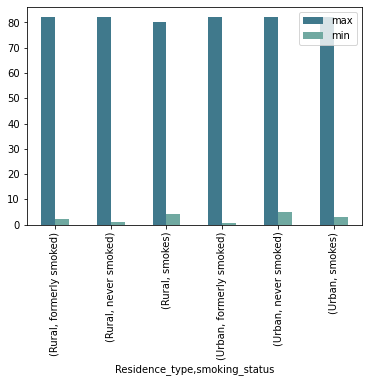

In [58]:
heart.groupby(['Residence_type','smoking_status']).age.agg([max,min]).plot(kind='bar', color=['#40798C','#70A9A1'])
plt.show()

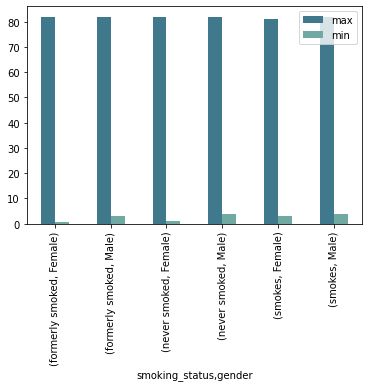

In [59]:
heart.groupby(['smoking_status','gender']).age.agg([max,min]).plot(kind='bar', color=['#40798C','#70A9A1'])
plt.show()

In [60]:
# Using the bar chart, we can visualize the maximum and minimum ages for different
# combinations of "smoking_status" and "gender." Each combination is shown with two bars, 
# one for the maximum age and one for the minimum age.

* <h3> Histogram </h3>

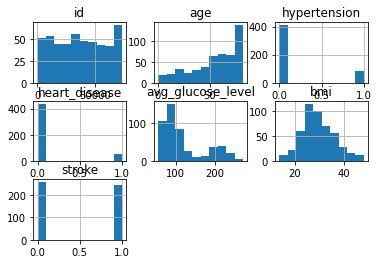

In [61]:
heart.hist()
plt.show()

In [62]:
# Each histogram is a visual representation of the distribution of values in a
# given column in the "heart" DataFrame.

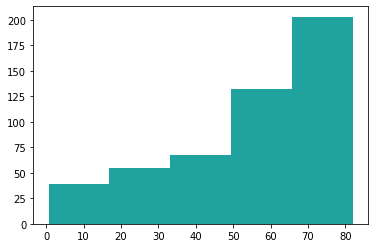

In [63]:
plt.hist(heart.age,bins=5, color='#20A39E')
plt.show()

In [64]:
# The bins parameter determines the number of intervals or bins in the histogram. In this case, 
# set it to 5, displaying the distribution of ages in five groups.

* <h3>Additional Chart:  Donut Chart </h3>

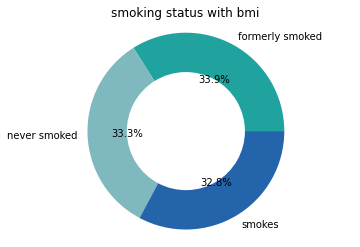

In [65]:
grouped = heart.groupby('smoking_status')['bmi'].mean()
labels = grouped.index
values = grouped.values
fig, ax = plt.subplots()
ax.pie(values, labels=labels, wedgeprops={'width': 0.4}, 
                                           autopct='%1.1f%%',
                                            colors = ['#20A39E','#7FB8BE','#2364AA'])
ax.axis('equal')  # Ensure the chart is circular
plt.title('smoking status with bmi')
plt.show()

In [66]:
# Taking the average BMI and grouping it with smoking status
# after that, the pie chart illustrates the smoking status of the average BMI
# For instance, if the average is equivalent to 33.9, it will check the
# corresponding Smoking status for that specific BMI

In [67]:
# The donut chart visualized how the age affected on the smoking status

* <h3>Additional Chart:  Lollipop Chart </h3>

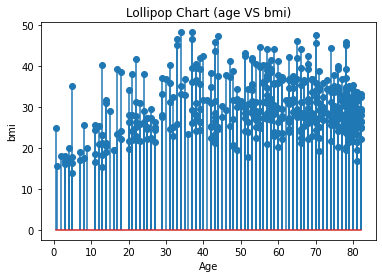

In [68]:
figure,axis= plt.subplots()
axis.stem(heart['age'], heart['bmi'])
axis.set_xlabel('Age')
axis.set_ylabel('bmi')
axis.set_title('Lollipop Chart (age VS bmi)')
plt.show()

In [69]:
# A lollipop chart is to illustrate the relationship
# between age and BMI. Each dot embodies an individual's age and BMI, 
# linked to the axis for clarity

# Feature Engineering 

*  Seperating the Features (X) from the target column (Y)


In [70]:
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,24892,Male,64.0,0,0,Yes,Private,Rural,97.08,31.7,formerly smoked,0
516,29496,Female,39.0,0,0,Yes,Private,Rural,84.79,35.7,never smoked,0
517,19939,Female,46.0,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked,0
518,27832,Female,51.0,0,0,Yes,Private,Rural,82.93,29.7,smokes,0


In [71]:
# Features (X)
X = heart.iloc[:, 1:-1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
515,Male,64.0,0,0,Yes,Private,Rural,97.08,31.7,formerly smoked
516,Female,39.0,0,0,Yes,Private,Rural,84.79,35.7,never smoked
517,Female,46.0,0,0,Yes,Private,Rural,78.75,37.8,formerly smoked
518,Female,51.0,0,0,Yes,Private,Rural,82.93,29.7,smokes


In [72]:
# Target (Y)
Y = heart.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
515    0
516    0
517    0
518    0
519    0
Name: stroke, Length: 496, dtype: int64

* <h3> Justification of choosing some features and exclusing other features: </h3>
       Factor analysis, Exaustive Feature Selection (EFS), Random forest Regressor (RFR) were used to get the best and most important features and exclude others such as id, smoking status. In addition, stroke column is choosed to be the target column for the purpose of predicting the possibility of a patient in having stroke in the future.
* id column were excluded because it could affect on the accuracy score

In [73]:
# One Hot Encoding
X = pd.get_dummies(X, columns=['gender','ever_married'])
X

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,ever_married_No,ever_married_Yes
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,0,1,0,1
1,61.0,0,0,Self-employed,Rural,202.21,36.6,never smoked,1,0,0,1
2,80.0,0,1,Private,Rural,105.92,32.5,never smoked,0,1,0,1
3,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,0,0,1
4,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,64.0,0,0,Private,Rural,97.08,31.7,formerly smoked,0,1,0,1
516,39.0,0,0,Private,Rural,84.79,35.7,never smoked,1,0,0,1
517,46.0,0,0,Private,Rural,78.75,37.8,formerly smoked,1,0,0,1
518,51.0,0,0,Private,Rural,82.93,29.7,smokes,1,0,0,1


In [74]:
X = X.drop(columns={"gender_Male","ever_married_No"})
X

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Female,ever_married_Yes
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,0,1
1,61.0,0,0,Self-employed,Rural,202.21,36.6,never smoked,1,1
2,80.0,0,1,Private,Rural,105.92,32.5,never smoked,0,1
3,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1
4,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,1
...,...,...,...,...,...,...,...,...,...,...
515,64.0,0,0,Private,Rural,97.08,31.7,formerly smoked,0,1
516,39.0,0,0,Private,Rural,84.79,35.7,never smoked,1,1
517,46.0,0,0,Private,Rural,78.75,37.8,formerly smoked,1,1
518,51.0,0,0,Private,Rural,82.93,29.7,smokes,1,1


In [75]:
X = pd.get_dummies(X, columns=['Residence_type'])
X

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,gender_Female,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,Private,228.69,36.6,formerly smoked,0,1,0,1
1,61.0,0,0,Self-employed,202.21,36.6,never smoked,1,1,1,0
2,80.0,0,1,Private,105.92,32.5,never smoked,0,1,1,0
3,49.0,0,0,Private,171.23,34.4,smokes,1,1,0,1
4,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
515,64.0,0,0,Private,97.08,31.7,formerly smoked,0,1,1,0
516,39.0,0,0,Private,84.79,35.7,never smoked,1,1,1,0
517,46.0,0,0,Private,78.75,37.8,formerly smoked,1,1,1,0
518,51.0,0,0,Private,82.93,29.7,smokes,1,1,1,0


In [76]:
X = X.drop(columns={'Residence_type_Rural'})
X

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,gender_Female,ever_married_Yes,Residence_type_Urban
0,67.0,0,1,Private,228.69,36.6,formerly smoked,0,1,1
1,61.0,0,0,Self-employed,202.21,36.6,never smoked,1,1,0
2,80.0,0,1,Private,105.92,32.5,never smoked,0,1,0
3,49.0,0,0,Private,171.23,34.4,smokes,1,1,1
4,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,1,0
...,...,...,...,...,...,...,...,...,...,...
515,64.0,0,0,Private,97.08,31.7,formerly smoked,0,1,0
516,39.0,0,0,Private,84.79,35.7,never smoked,1,1,0
517,46.0,0,0,Private,78.75,37.8,formerly smoked,1,1,0
518,51.0,0,0,Private,82.93,29.7,smokes,1,1,0


In [77]:
X.rename(columns={'gender_Female':'gender', 'ever_married_Yes':'ever_married','Residence_type_Urban':'Residence_type'}, inplace=True)
X

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,gender,ever_married,Residence_type
0,67.0,0,1,Private,228.69,36.6,formerly smoked,0,1,1
1,61.0,0,0,Self-employed,202.21,36.6,never smoked,1,1,0
2,80.0,0,1,Private,105.92,32.5,never smoked,0,1,0
3,49.0,0,0,Private,171.23,34.4,smokes,1,1,1
4,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,1,0
...,...,...,...,...,...,...,...,...,...,...
515,64.0,0,0,Private,97.08,31.7,formerly smoked,0,1,0
516,39.0,0,0,Private,84.79,35.7,never smoked,1,1,0
517,46.0,0,0,Private,78.75,37.8,formerly smoked,1,1,0
518,51.0,0,0,Private,82.93,29.7,smokes,1,1,0


In [78]:
# Label Encoder for features with more than 2 classifications

df1 = preprocessing.LabelEncoder()
X['smoking_status'] = df1.fit_transform(X['smoking_status'])
X

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,gender,ever_married,Residence_type
0,67.0,0,1,Private,228.69,36.6,0,0,1,1
1,61.0,0,0,Self-employed,202.21,36.6,1,1,1,0
2,80.0,0,1,Private,105.92,32.5,1,0,1,0
3,49.0,0,0,Private,171.23,34.4,2,1,1,1
4,79.0,1,0,Self-employed,174.12,24.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
515,64.0,0,0,Private,97.08,31.7,0,0,1,0
516,39.0,0,0,Private,84.79,35.7,1,1,1,0
517,46.0,0,0,Private,78.75,37.8,0,1,1,0
518,51.0,0,0,Private,82.93,29.7,2,1,1,0


In [79]:
df1 = preprocessing.LabelEncoder()
X['work_type'] = df1.fit_transform(X['work_type'])
X

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,gender,ever_married,Residence_type
0,67.0,0,1,2,228.69,36.6,0,0,1,1
1,61.0,0,0,3,202.21,36.6,1,1,1,0
2,80.0,0,1,2,105.92,32.5,1,0,1,0
3,49.0,0,0,2,171.23,34.4,2,1,1,1
4,79.0,1,0,3,174.12,24.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
515,64.0,0,0,2,97.08,31.7,0,0,1,0
516,39.0,0,0,2,84.79,35.7,1,1,1,0
517,46.0,0,0,2,78.75,37.8,0,1,1,0
518,51.0,0,0,2,82.93,29.7,2,1,1,0


In [80]:
X.drop(columns=['smoking_status','work_type'], inplace=True)

In [81]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type
0,67.0,0,1,228.69,36.6,0,1,1
1,61.0,0,0,202.21,36.6,1,1,0
2,80.0,0,1,105.92,32.5,0,1,0
3,49.0,0,0,171.23,34.4,1,1,1
4,79.0,1,0,174.12,24.0,1,1,0
...,...,...,...,...,...,...,...,...
515,64.0,0,0,97.08,31.7,0,1,0
516,39.0,0,0,84.79,35.7,1,1,0
517,46.0,0,0,78.75,37.8,1,1,0
518,51.0,0,0,82.93,29.7,1,1,0


# Dimensionality Reduction

* <h2> Factor Analysis </h2> 

The process of breaking down a large number of variables into smaller numbers of factors. With this method, all variables are extracted to have the largest common variance and combined into a single score.

- Factor Analysis were used to reduce the dimensions of the dataframe to be 4 components 

In [82]:
X.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type
age,1.000000,0.254807,0.272328,0.286808,0.194814,-0.024628,0.520232,0.100905
hypertension,0.254807,1.000000,0.076166,0.231157,0.146068,-0.029630,0.082292,-0.001582
heart_disease,0.272328,0.076166,1.000000,0.227582,0.062032,-0.128005,0.062813,0.071471
avg_glucose_level,0.286808,0.231157,0.227582,1.000000,0.267408,-0.143192,0.197370,0.045020
bmi,0.194814,0.146068,0.062032,0.267408,1.000000,-0.037847,0.276371,0.050204
gender,-0.024628,-0.029630,-0.128005,-0.143192,-0.037847,1.000000,-0.049088,-0.010764
ever_married,0.520232,0.082292,0.062813,0.197370,0.276371,-0.049088,1.000000,-0.018843
Residence_type,0.100905,-0.001582,0.071471,0.045020,0.050204,-0.010764,-0.018843,1.000000


In [83]:
fa = FactorAnalysis(n_components=4)

In [84]:
fa_x = fa.fit_transform(X)
fa_x

array([[ 1.92844518,  0.10880241,  0.54680572,  0.20950988],
       [ 1.44839156,  0.22842353,  0.70189481, -0.36208547],
       [-0.20349016, -1.2693908 ,  0.33987857,  0.16204827],
       ...,
       [-0.75730259,  0.16080133,  1.51701431, -0.47783348],
       [-0.67690119, -0.03466571,  0.20277389, -0.56601478],
       [-0.61657163,  0.93702131,  1.26692216, -0.54762128]])

In [85]:
new_X = pd.DataFrame(fa_x, columns=['f1','f2','f3','f4'])
new_X

,f1,f2,f3,f4
0,1.928445,0.108802,0.546806,0.209510
1,1.448392,0.228424,0.701895,-0.362085
2,-0.203490,-1.269391,0.339879,0.162048
3,0.874463,0.605398,0.574493,-0.352114
4,0.988819,-0.777877,-1.260929,-0.144321
...,...,...,...,...
491,-0.396699,-0.564592,0.365222,-0.396565
492,-0.668450,0.533865,1.212046,-0.608726
493,-0.757303,0.160801,1.517014,-0.477833
494,-0.676901,-0.034666,0.202774,-0.566015


# Feature Selection

* <b>ANOVA F-value: </b> its is a statistic used in Analysis of Variance (ANOVA) to assess whether the means of two or more groups are significantly different from each other

In [86]:
# Get the F-Score
# We will only choose the first one --> F-Value 
reg = f_regression(X,Y)[0]
reg

array([260.02934928,  25.0907853 ,  27.19730502,  21.9853158 ,
         4.48606438,   1.80175974,  33.21476405,   5.05282211])

In [87]:
FandFscore=pd.DataFrame({'Features':X.columns, 'F-Score':reg})
FandFscore

,Features,F-Score
0,age,260.029349
1,hypertension,25.090785
2,heart_disease,27.197305
3,avg_glucose_level,21.985316
4,bmi,4.486064
5,gender,1.801760
6,ever_married,33.214764
7,Residence_type,5.052822


In [88]:
# Sort the F-score values from highest to lowest
FandFscore.sort_values('F-Score', ascending=False)

,Features,F-Score
0,age,260.029349
6,ever_married,33.214764
2,heart_disease,27.197305
1,hypertension,25.090785
3,avg_glucose_level,21.985316
7,Residence_type,5.052822
4,bmi,4.486064
5,gender,1.801760


In [89]:
# "age" feature is having the highest F-Value so it is having a high degree of linearity
# "gender" feature is having the lowest F-value so it attempts to have a low degree of linearity

* Exhaustive feature selection (EFS)

In [90]:
lr = LinearRegression()

In [91]:
EFS = ExhaustiveFeatureSelector(estimator=lr, scoring='r2', max_features=8)

In [92]:
EFS.fit(X,Y)

Features: 255/255

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7]],
                          max_features=8, scoring='r2')

In [93]:
EFS.best_feature_names_

('age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'gender',
 'ever_married')

In [94]:
# Put the best features names in a seperate df
X2 = X[list(EFS.best_feature_names_)]
X2

,age,hypertension,heart_disease,avg_glucose_level,gender,ever_married
0,67.0,0,1,228.69,0,1
1,61.0,0,0,202.21,1,1
2,80.0,0,1,105.92,0,1
3,49.0,0,0,171.23,1,1
4,79.0,1,0,174.12,1,1
...,...,...,...,...,...,...
515,64.0,0,0,97.08,0,1
516,39.0,0,0,84.79,1,1
517,46.0,0,0,78.75,1,1
518,51.0,0,0,82.93,1,1


In [95]:
# Random Forest Regressor (RFR) : to get the most important features
RFR=RandomForestRegressor(random_state=10)

In [96]:
RFR.fit(X,Y)

RandomForestRegressor(random_state=10)

In [97]:
RFR.feature_importances_

array([0.49774156, 0.02415145, 0.02517436, 0.19971201, 0.19443521,
       0.02376341, 0.0106963 , 0.0243257 ])

In [98]:
FandRFR=pd.DataFrame({"Feature":X.columns,"RFR_Score":RFR.feature_importances_})

In [99]:
# Sort the features from most important to least important
FandRFR.sort_values('RFR_Score',ascending=False)

,Feature,RFR_Score
0,age,0.497742
3,avg_glucose_level,0.199712
4,bmi,0.194435
2,heart_disease,0.025174
7,Residence_type,0.024326
1,hypertension,0.024151
5,gender,0.023763
6,ever_married,0.010696


* <h2><b> Logistic Regression</b> </h2>

* is a statistical method for binary classification that models the probability of an instance belonging to a class using the logistic function.

In [100]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.80, random_state=10)

In [101]:
Xtrain

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type
279,27.0,0,0,82.90,25.0,0,1,1
120,58.0,0,0,59.86,28.0,1,1,0
12,54.0,0,0,104.51,27.3,1,1,1
158,71.0,0,0,195.71,34.1,1,1,1
242,68.0,0,0,233.94,42.4,0,1,0
...,...,...,...,...,...,...,...,...
331,78.0,1,0,182.20,30.5,1,1,1
16,64.0,0,1,191.61,37.5,0,1,1
508,60.0,0,0,65.38,41.2,1,1,1
133,38.0,0,0,101.45,36.5,1,1,0


In [102]:
Xtest

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type
286,23.0,0,0,94.09,30.9,1,0,1
355,66.0,1,0,205.23,39.5,1,1,0
160,76.0,0,0,57.92,25.0,1,1,1
315,57.0,0,1,62.20,31.0,0,1,0
154,55.0,0,0,92.98,25.6,1,1,0
...,...,...,...,...,...,...,...,...
424,68.0,0,0,79.58,22.2,1,1,1
85,54.0,0,0,88.92,29.1,0,1,0
193,68.0,1,1,271.74,31.1,0,1,0
485,31.0,0,0,98.99,31.2,1,1,1


In [103]:
Ytrain

279    0
120    1
12     1
158    1
242    1
      ..
331    0
16     1
508    0
133    1
276    0
Name: stroke, Length: 99, dtype: int64

In [104]:
Ytest

286    0
355    0
160    1
315    0
154    1
      ..
424    0
85     1
193    1
485    0
228    1
Name: stroke, Length: 397, dtype: int64

In [105]:
#creates an instance of the Logistic Regression model
logre = LogisticRegression()

In [106]:
logre.fit(Xtrain,Ytrain)

C:\Users\meroa\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
YPredict = logre.predict(Xtest)

In [108]:
accuracy = accuracy_score(Ytest,YPredict)

In [109]:
# The Accuracy Value
accuracy

0.7732997481108312

In [110]:
confusion_matrix(Ytest, YPredict)

array([[157,  44],
       [ 46, 150]], dtype=int64)

In [111]:
Ytest.value_counts()

0    201
1    196
Name: stroke, dtype: int64

* <h2><b>KNeighbors Classifier</b></h2>
    assigns a class label to a data point based on the majority class of its k nearest neighbors in the feature space.

In [112]:
knc = KNeighborsClassifier()

In [113]:
knc.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [114]:
knc.predict(Xtest)

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [115]:
knc.predict([[23.0,0,0,94.09,30.9,1,0,1]])

C:\Users\meroa\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [116]:
# Justification --> array([1]) is equavalent to 'yes' in the stroke 
# So we can understand from this , that this person is more likely
# to have stroke in the future. 

In [117]:
knc.predict([[78.0,1,0,182.20,30.5,1,1,1]])

C:\Users\meroa\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [118]:
# Justification --> array([0]) is equavalent to 'No' in the stroke 
# So we can understand from this , that this person is more likely
# to not have stroke in the future.

In [119]:
Ypredict2 =knc.predict(Xtest)
accuracy_score(Ytest,Ypredict2)

0.6876574307304786

# Conslusion

* After applying different ways of machine learning algorithms (logistic regression, KNeighbors Classifier) to get the prediction accuracy score we can understand that the most appropriate way of predicting the stroke in this data frame was the logistic regression which resulted in approximately <b>0.77 </b> accuracy score